# Unsupervised Learning Project

## Context:

The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the
silhouette. The vehicle may be viewed from one of many different angles.


## Data description:

The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were
used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular
combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily
distinguishable, but it would be more difficult to distinguish between the cars.


## Attribute information:

● All the features are geometric features extracted from the silhouette.  
● All are numeric in nature  

## Objective:

Apply the dimensionality reduction technique – PCA and train a model using principal components instead of training the
model using just the raw data.

In [1]:
# Import necessary libraries

import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# Read csv file as dataframe

vehicle_df = pd.read_csv('vehicle.csv')
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [83]:
# Check the shape, null values and data type of each attribute
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

#### There 846 rows with 19 columns (no string-types except the target variable) having a few null values...  
#### We will replace the null values with median value of that column

In [3]:
# Get Columns having null values
col_summary = vehicle_df.isna().any().to_dict()
cols_with_null = [col for col in col_summary if col_summary[col]==True]

# Replace the nulls in these columns with median values
for col in cols_with_null:
    vehicle_df[col].fillna(vehicle_df[col].median(), inplace=True)

In [4]:
# Check the data distribution within the columns
vehicle_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

#### Let's check for outliers in each feature and their count

In [21]:
# Define function to calculate and print out the outlier count

def get_outlier_summary(data, cols, return_index=False):
    """
    Identifies the outliers in the data
    and returns the column-wise outlier indices
    
    Extended description of function.

    Parameters
    ----------
    data : pd.DataFrame
        The dataframe in which to find the outliers
    
    cols : list like iterable
        Columns across which to find the outliers
    
    return_index : Boolean, default=False
        If True, returns the combined set of indices having outliers in at least one column
    
    Returns
    ----------
    set or int
        Based on return_index, returns either 
        combined set of indices having outlier in at least one column or 
        outliers count
    """
    
    global_indices = set()
    q1 = data[cols].quantile(0.25)
    q3 = data[cols].quantile(0.75)
    iqr = q3 - q1
    min_val = q1 - 1.5*iqr
    max_val = q3 + 1.5*iqr
    
    for col in cols:
        outliers = data[(data[col] > max_val[col]) | (data[col] < min_val[col])][col]
        outlier_count = outliers.count()
        local_indices = outliers.index
        global_indices.update(local_indices)
        print(f"Outliers in {col} are {outlier_count}")
            
    return global_indices if return_index else len(global_indices)

# Get the outlier in continuous features
outliers = get_outlier_summary(vehicle_df, [col for col in vehicle_df.columns if col != 'class'])
print(f"Total outliers: {outliers}")

Outliers in compactness are 0
Outliers in circularity are 0
Outliers in distance_circularity are 0
Outliers in radius_ratio are 3
Outliers in pr.axis_aspect_ratio are 8
Outliers in max.length_aspect_ratio are 13
Outliers in scatter_ratio are 0
Outliers in elongatedness are 0
Outliers in pr.axis_rectangularity are 0
Outliers in max.length_rectangularity are 0
Outliers in scaled_variance are 1
Outliers in scaled_variance.1 are 2
Outliers in scaled_radius_of_gyration are 0
Outliers in scaled_radius_of_gyration.1 are 15
Outliers in skewness_about are 12
Outliers in skewness_about.1 are 1
Outliers in skewness_about.2 are 0
Outliers in hollows_ratio are 0
Total outliers: 33


#### To decide if we should remove the outliers, we need to have a look at the distribution for these variables. 

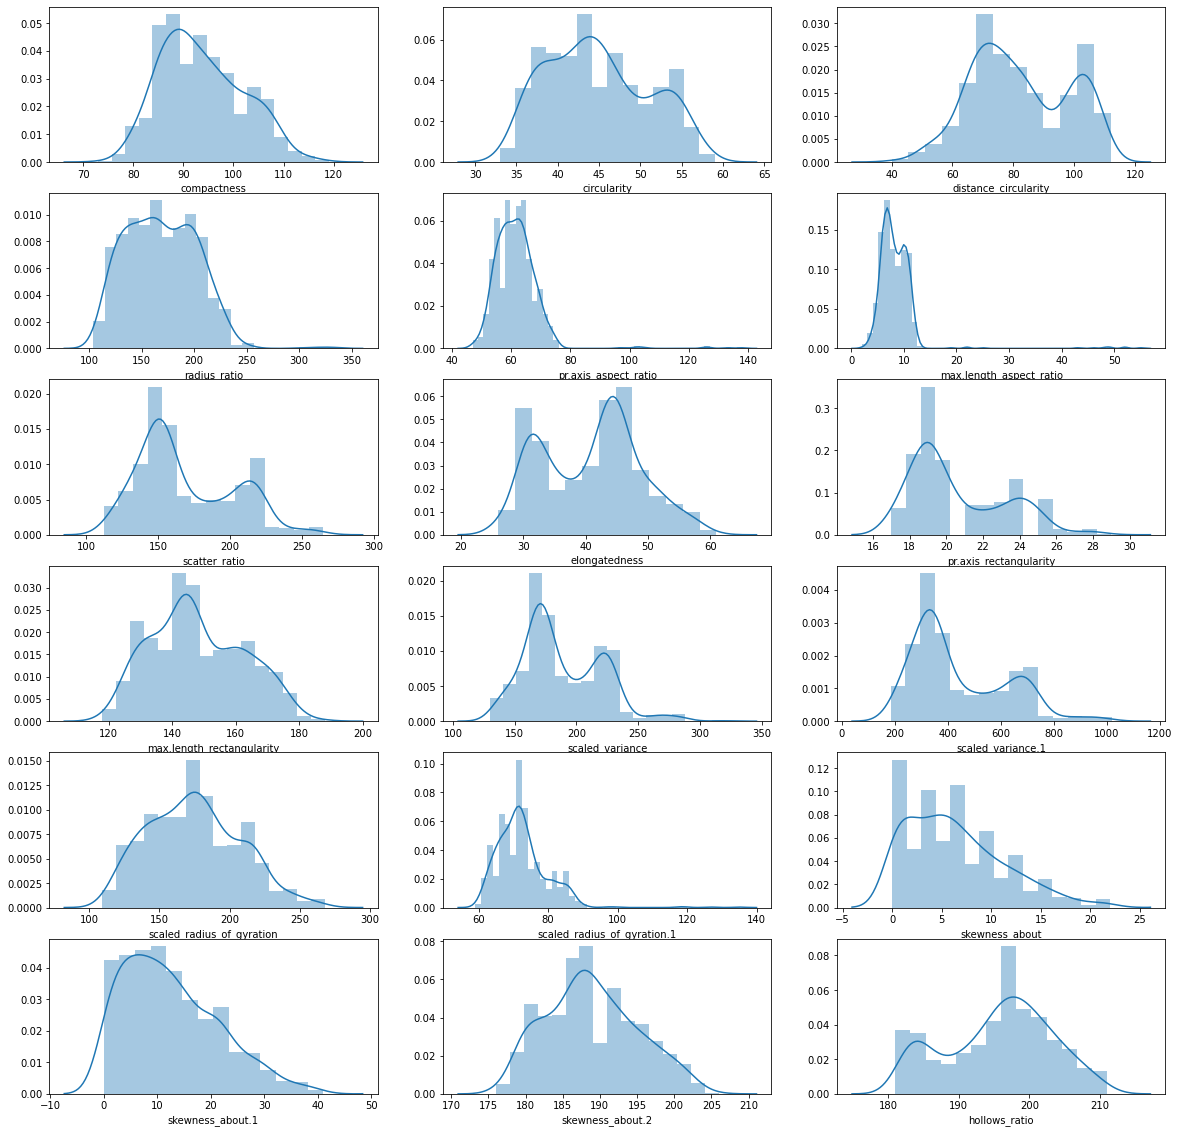

In [26]:
# Check distributions for continuous variables
continuous_vars = [col for col in vehicle_df.columns if col != 'class']
f, axes = plt.subplots(6, 3, figsize=(20,20))

for i, var in enumerate(continuous_vars):
    sns.distplot(vehicle_df[var], ax=axes.flatten()[i])

● **compactness, radius_ratio, max_length_rectangularity, scaled_radius_of_gyration, skewness_about.2** are fairly normally distributed  
● **circularity, distance_circularity, scatter_ratio, elongatedness, pr_axis_rectangularity, scaled_variance, scaled_variance.1, hollows_ratio** are also normally distributed but with two peaks (**bi-modal**)  
● **pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_radius_of_gyration.1, skewness_about, skewness_about.1** are left skewed.  

#### Let's look at the target variable distribution  

In [5]:
# Target variable distribution

vehicle_df['class'].value_counts(normalize=True)

car    0.507092
bus    0.257683
van    0.235225
Name: class, dtype: float64

#### The dataset is only a little imbalanced  
#### Coming back to outliers, we see that due to the nature of distribution of these variables, mostly the larger values seem like outliers.
#### We will focus on few variables which have heavy skew such as radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio and scaled_radius_of_gyration_1 to see their distribution of Target variable to either side of the threshold to make sure we can remove such values  

In [6]:
## We choose the threshold based on the plots above 
#  For radius_ratio, we can test with threshold=275
#  For pr.axis_aspect_ratio, we can test with threshold=80
#  For max.length_aspect_ratio we can test with threshold=15
#  For scaled_radius_of_gyration.1 we can test with threshold=95

thresholds = {
    'radius_ratio': 275,
    'pr.axis_aspect_ratio': 80,
    'max.length_aspect_ratio': 15,
    'scaled_radius_of_gyration.1': 90
}

for col in thresholds:
    # We won't tolerate the distribution to go below 20% (in favour of van and bus class) for the left side of threshold
    van_ratio = vehicle_df[vehicle_df[col]<thresholds[col]]['class'].value_counts(normalize=True)['van']
    bus_ratio = vehicle_df[vehicle_df[col]<thresholds[col]]['class'].value_counts(normalize=True)['bus']
    if van_ratio < 0.2 or bus_ratio < 0.2:
        print(f"Threshold of {thresholds[col]} for {col} is NOT OK")
    else:
        print(f"Threshold of {thresholds[col]} for {col} is OK")

Threshold of 275 for radius_ratio is OK
Threshold of 80 for pr.axis_aspect_ratio is OK
Threshold of 15 for max.length_aspect_ratio is OK
Threshold of 90 for scaled_radius_of_gyration.1 is OK


#### So we remove outliers for the above columns

In [7]:
vehicle_df = vehicle_df[vehicle_df['radius_ratio'] <= 275]
vehicle_df = vehicle_df[vehicle_df['pr.axis_aspect_ratio'] <= 80]
vehicle_df = vehicle_df[vehicle_df['max.length_aspect_ratio'] <= 15]
vehicle_df = vehicle_df[vehicle_df['scaled_radius_of_gyration.1'] <= 90]

## Some Bivariate analysis

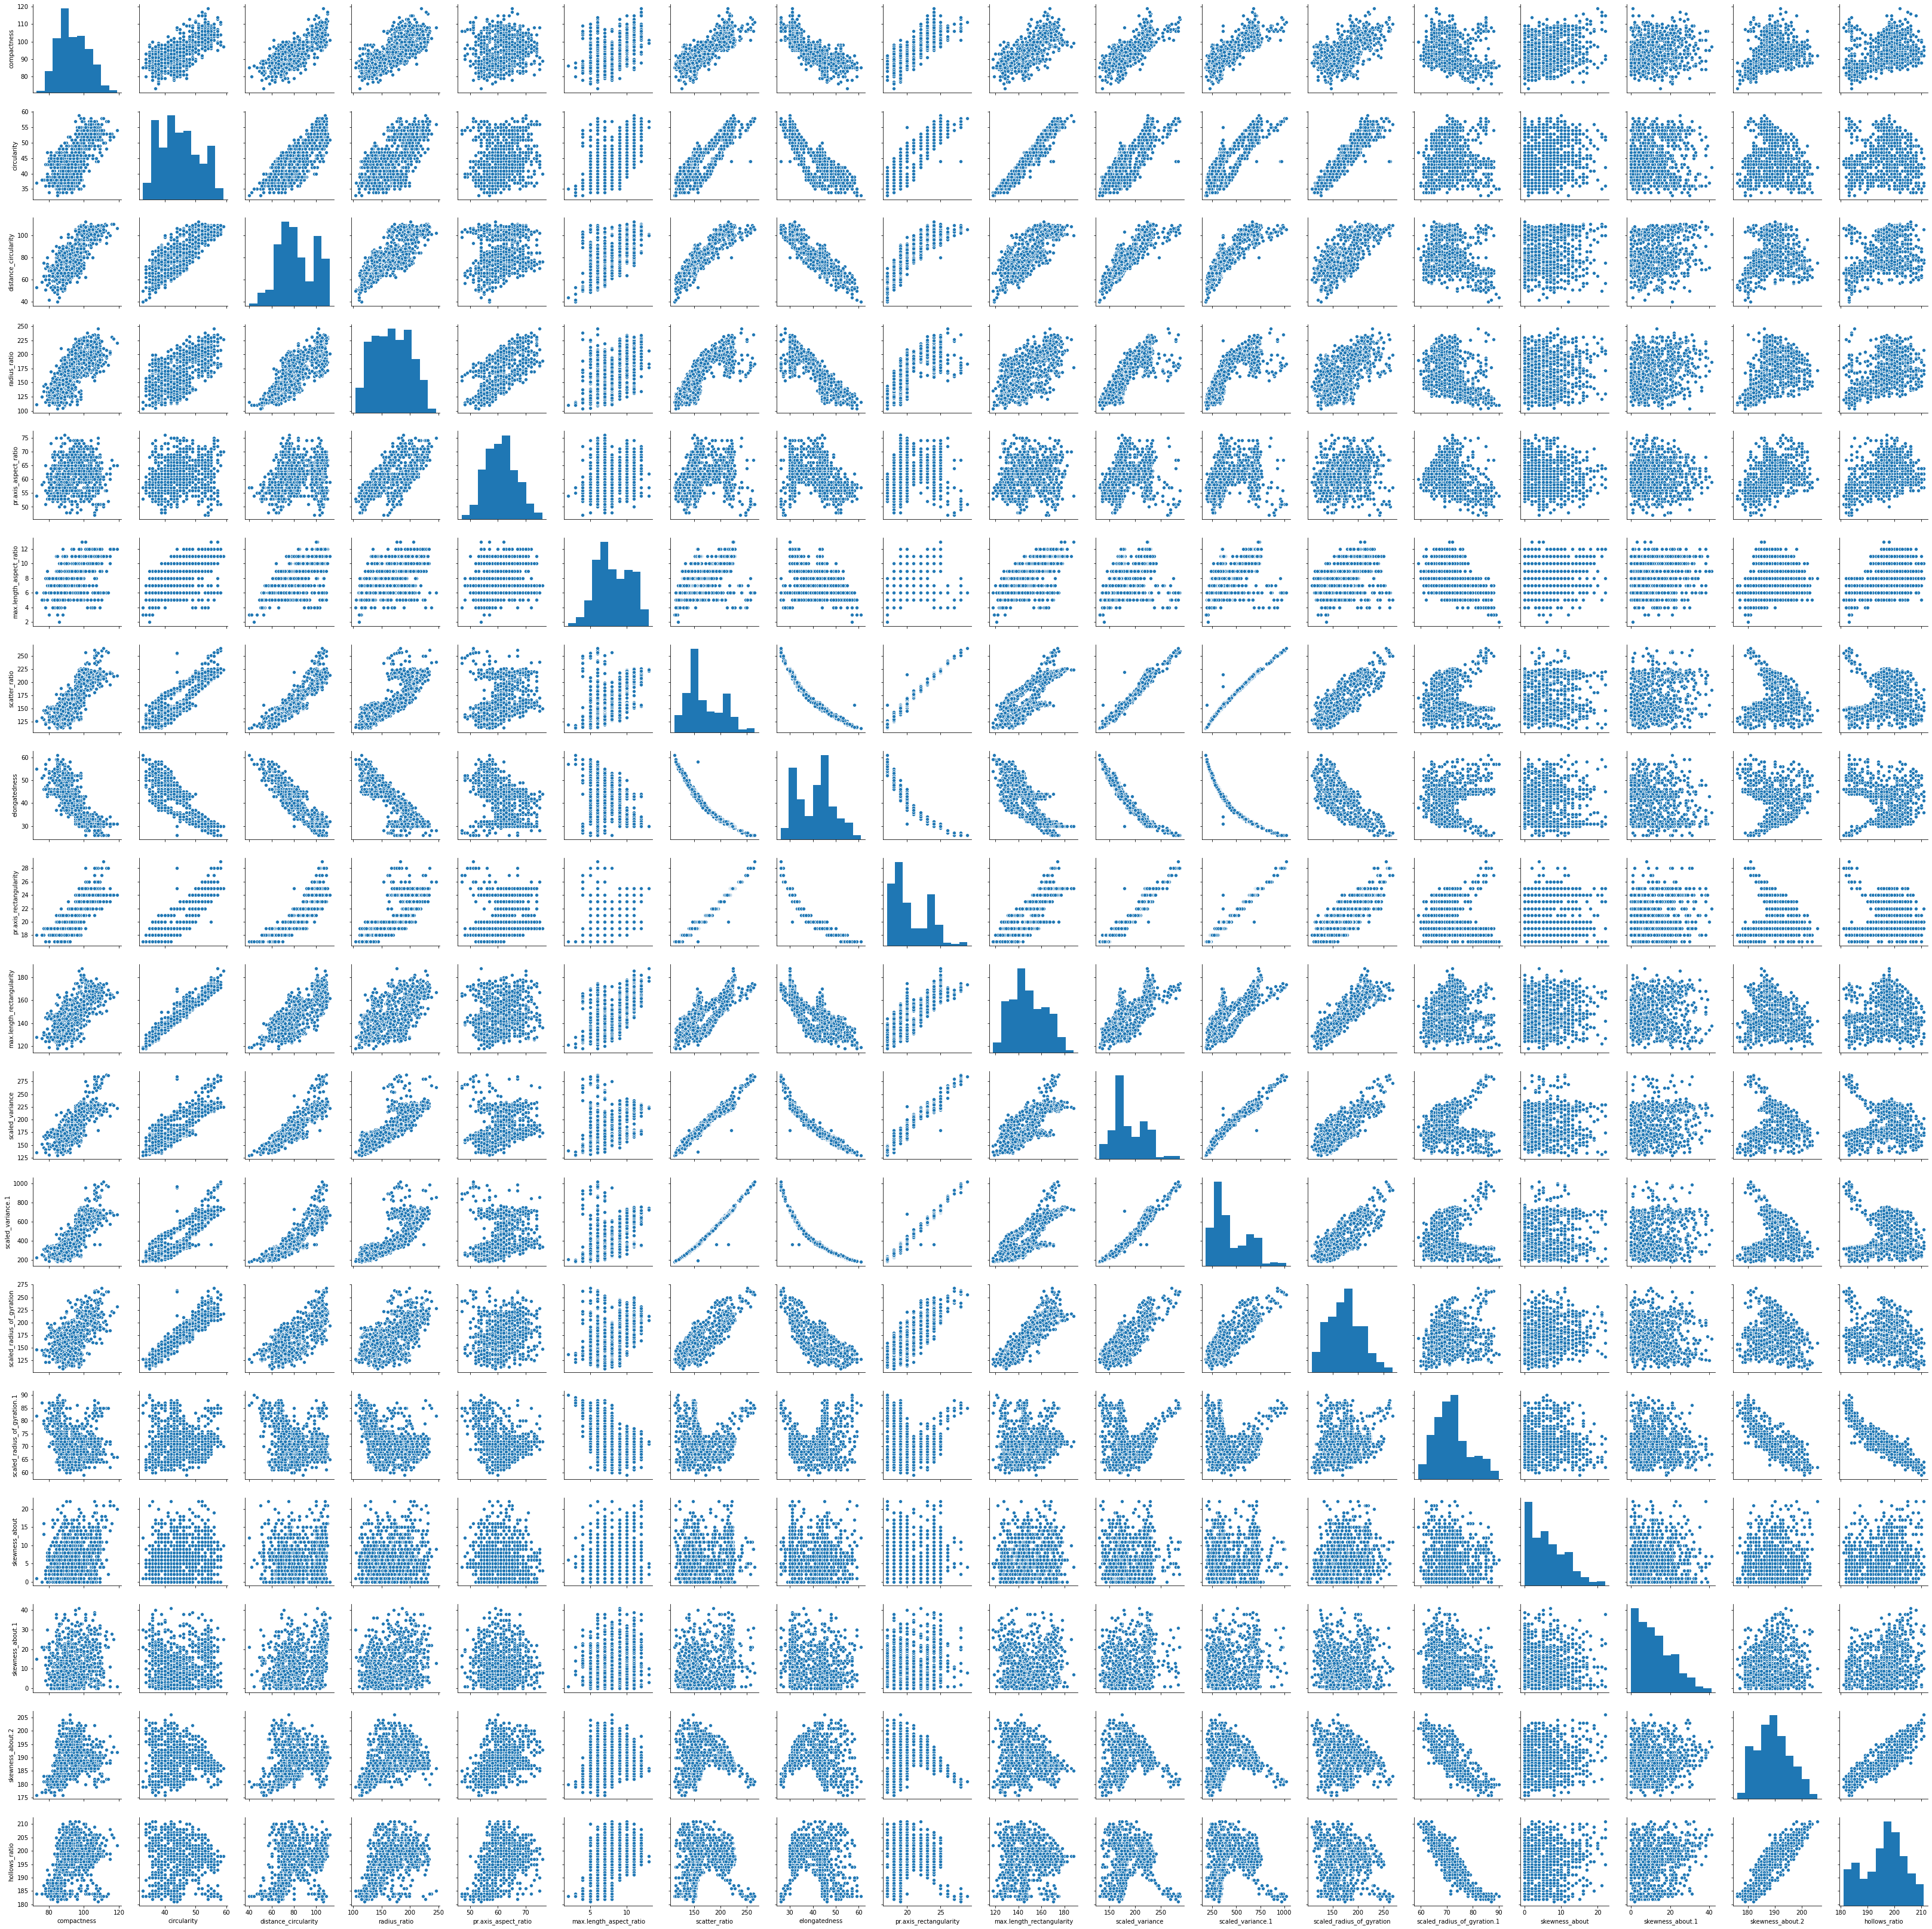

In [56]:
# We use seaborn pairplot to do the bivariate analysis for continuous features and target 

sns.pairplot(vehicle_df)

#### A broader level view of the above plots shows that there are a few features which have a good correlation with each other.
#### We will get a better idea when we will plot the correlation matrix  

## Some Multivariate analysis:

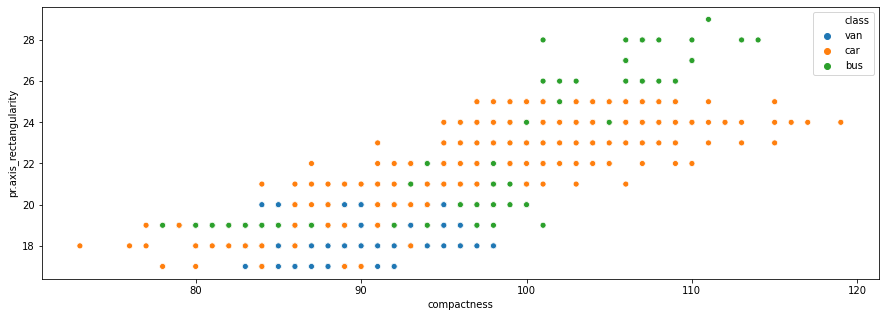

In [66]:
# Balance vs campaign split by Target
f, axes = plt.subplots(1, 1, figsize=(15,5))

sns.scatterplot(x='compactness', y='pr.axis_rectangularity', data=vehicle_df, hue='class', ax=axes)

#### This seem to suggest that higher pr.axis_rectangularity belongs to bus, whereas that between 21 and 26 belongs mostly to car  

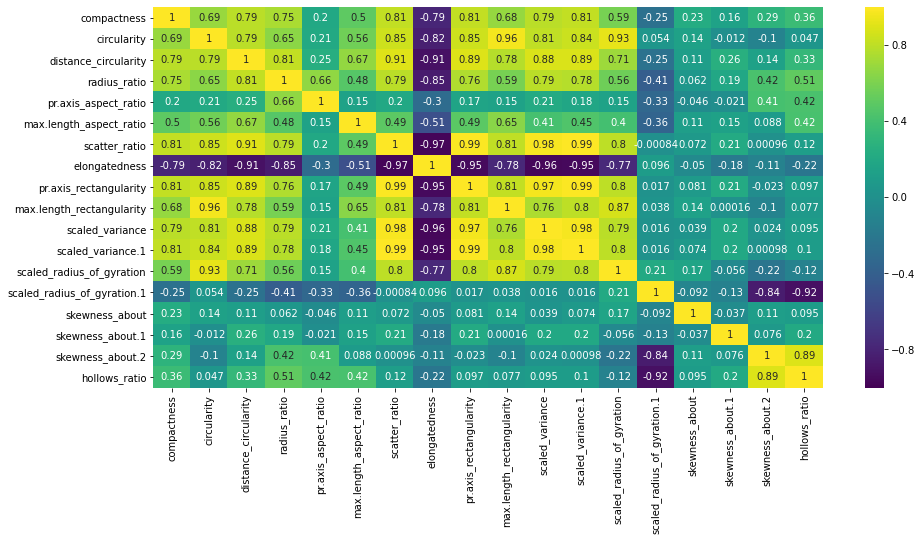

In [67]:
# Correlation among variables
plt.figure(figsize=[15,7])

sns.heatmap(vehicle_df.corr(), cmap='viridis', vmin=-1, vmax=1, annot=True)

#### This shows that there are a lot of features which are highly correlated with each other. The top 13 columns (except pr.axis_aspect_ratio) are fairly correlated with each other (positive or negative)

In [8]:
# Label encode the target class variable

mapping = {
    "car": 1,
    "bus": 2,
    "van": 3
}

vehicle_df['class'] = vehicle_df['class'].apply(lambda x: mapping[x])

## Model Building starts...

In [9]:
from sklearn.model_selection import train_test_split

X = vehicle_df.drop('class', axis=1)
y = vehicle_df['class']

# Note: Set stratify to make sure class imbalances are preserved after split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12, stratify=y)

# Verify distribution of target variable in test set
y_test.value_counts(normalize=True)

1    0.513944
2    0.254980
3    0.231076
Name: class, dtype: float64

#### Since many of continuous features have a larger scale, we need to scale them out to bring them closer to categorical features.
#### For this, we will use MinMaxScaler (and not StandardScaler) which will preserve the distribution of the data in features
#### Note: We do the scaling seperately on train and test set so as to mimic the real world scenario where we obviously can't scale the incoming data with train data that has been used to build the model

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      0.97      0.98       129
           2       0.97      1.00      0.98        64
           3       0.95      0.97      0.96        58

    accuracy                           0.98       251
   macro avg       0.97      0.98      0.97       251
weighted avg       0.98      0.98      0.98       251



In [12]:
# We create a generic grid search function which can be used for multiple ML models/algorithms
# It uses Stratified k-fold CV

import copy
from sklearn.model_selection import GridSearchCV, StratifiedKFold

def get_best_model(X, y, estimator_specs):
    """
    Finds the best model among the estimators among all possible ones
    as defined in param_grid and returns the best estimator.

    Extended description of function.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Samples vector, where n_samples is the number of samples and
        n_features is the number of features.
    
    y : array-like of shape (n_samples,)
        Target vector relative to X.
    
    estimator_specs : list of dictionaries
        List of dictionaries where each dictionary specifies the details of a single estimator object.
        The dictionary has following keys and values:
        
            estimator  : estimator object
                An estimator object (classifier instance)
                
            params : dict or list of dictionaries
                Dictionary with parameters names (string) as keys and lists of parameter settings to try as values,
                or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored.
                This enables searching over any sequence of parameter settings.
                
            scorer : scoring function or None
                A custom scoring function. This goes as a value to 'scoring' argument in GridSearchCV.
                If None, then estimator's score function is used.
    
    Returns
    -------
    List of estimator objects(as dictionaries)
        List of dictionaries of best estimator object (which has best score) along with their scores and results.

    """
    
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    results = list()
    for estimator in estimator_specs:
        best_estimator = dict()
        gs_object = GridSearchCV(estimator['estimator'],
                                param_grid=estimator['params'],
                                scoring=estimator['scorer'],
                                cv=kfold,
                                verbose=2)
        gs_object.fit(X, y)
        best_estimator['estimator'] = gs_object.best_estimator_
        best_estimator['score'] = gs_object.best_score_
        best_estimator['results'] = pd.DataFrame(gs_object.cv_results_).drop('params', axis=1)
        results.append(copy.deepcopy(best_estimator))
    
    return results

In [13]:
# We will be providing grid search with complete dataset as it internally would use stratified k-fold cross validation
# Hence, we need to scale the whole data prior to that
X = scaler.fit_transform(X, y)

# We will use the log_loss as our custom scorer because it is a multi class problem
from sklearn.metrics import make_scorer, log_loss
custom_scorer = make_scorer(log_loss, needs_proba=True, greater_is_better=False)

In [14]:
# We define the parameter grids for each of the models
# SVM
svm_params = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [0.01, 0.1, 1, 10, 100],
              'kernel': ['poly', 'rbf']}
estimator_specs = [
    {
        # SVM
        'estimator': SVC(random_state=42, probability=True),
        'params'   : svm_params,
        'scorer'   : custom_scorer
    }
]

results = get_best_model(X, y, estimator_specs)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] C=0.01, gamma=0.01, kernel=poly .................................
[CV] .................. C=0.01, gamma=0.01, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=poly .................................
[CV] .................. C=0.01, gamma=0.01, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=poly .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=0.01, gamma=0.01, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=poly .................................
[CV] .................. C=0.01, gamma=0.01, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=poly .................................
[CV] .................. C=0.01, gamma=0.01, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=poly .................................
[CV] .................. C=0.01, gamma=0.01, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=poly .................................
[CV] .................. C=0.01, gamma=0.01, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=poly .................................
[CV] .................. C=0.01, gamma=0.01, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=poly .................................
[CV] .................. C=0.01, gamma=0.01, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=poly .................................
[CV] .

[CV] .................... C=0.01, gamma=10, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=10, kernel=poly ...................................
[CV] .................... C=0.01, gamma=10, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=10, kernel=poly ...................................
[CV] .................... C=0.01, gamma=10, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=10, kernel=poly ...................................
[CV] .................... C=0.01, gamma=10, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=10, kernel=poly ...................................
[CV] .................... C=0.01, gamma=10, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=10, kernel=poly ...................................
[CV] .................... C=0.01, gamma=10, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=10, kernel=poly ...................................
[CV] .................... C=0.01, gamma=10, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=10, kernel=poly ...................................
[CV] .

[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .

[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=100, kernel=poly ...................................
[CV] .................... C=0.1, gamma=100, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=100, kernel=poly ...................................
[CV] .................... C=0.1, gamma=100, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=100, kernel=poly ...................................
[CV] .................... C=0.1, gamma=100, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=100, kernel=poly ...................................
[CV] .................... C=0.1, gamma=100, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=100, kernel=poly ...................................
[CV] .................... C=0.1, gamma=100, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=100, kernel=poly ...................................
[CV] .

[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.1s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.1s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] .

[CV] ....................... C=1, gamma=100, kernel=rbf, total=   0.3s
[CV] C=1, gamma=100, kernel=rbf ......................................
[CV] ....................... C=1, gamma=100, kernel=rbf, total=   0.3s
[CV] C=1, gamma=100, kernel=rbf ......................................
[CV] ....................... C=1, gamma=100, kernel=rbf, total=   0.3s
[CV] C=1, gamma=100, kernel=rbf ......................................
[CV] ....................... C=1, gamma=100, kernel=rbf, total=   0.3s
[CV] C=1, gamma=100, kernel=rbf ......................................
[CV] ....................... C=1, gamma=100, kernel=rbf, total=   0.3s
[CV] C=1, gamma=100, kernel=rbf ......................................
[CV] ....................... C=1, gamma=100, kernel=rbf, total=   0.3s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .................... C=10, gamma=0.01, kernel=poly, total=   0.1s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .

[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=poly .....................................
[CV] .

[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ..................... C=100, gamma=10, kernel=poly, total=   0.1s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] ...................... C=100, gamma=10, kernel=rbf, total=   0.2s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] ...................... C=100, gamma=10, kernel=rbf, total=   0.2s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] ...................... C=100, gamma=10, kernel=rbf, total=   0.2s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] ...................... C=100, gamma=10, kernel=rbf, total=   0.2s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] ...................... C=100, gamma=10, kernel=rbf, total=   0.2s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] ...................... C=100, gamma=10, kernel=rbf, total=   0.2s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] .

[CV] ................... C=1000, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=poly ..................................
[CV] ................... C=1000, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=poly ..................................
[CV] ................... C=1000, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .

[CV] ................... C=1000, gamma=100, kernel=poly, total=   0.1s
[CV] C=1000, gamma=100, kernel=poly ..................................
[CV] ................... C=1000, gamma=100, kernel=poly, total=   0.1s
[CV] C=1000, gamma=100, kernel=poly ..................................
[CV] ................... C=1000, gamma=100, kernel=poly, total=   0.1s
[CV] C=1000, gamma=100, kernel=rbf ...................................
[CV] .................... C=1000, gamma=100, kernel=rbf, total=   0.4s
[CV] C=1000, gamma=100, kernel=rbf ...................................
[CV] .................... C=1000, gamma=100, kernel=rbf, total=   0.3s
[CV] C=1000, gamma=100, kernel=rbf ...................................
[CV] .................... C=1000, gamma=100, kernel=rbf, total=   0.4s
[CV] C=1000, gamma=100, kernel=rbf ...................................
[CV] .................... C=1000, gamma=100, kernel=rbf, total=   0.3s
[CV] C=1000, gamma=100, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  1.1min finished


In [15]:
for algo in results:
    print(f"Best Estimator: {algo['estimator']}")
    print(f"Best Score: {algo['score']}\n")

Best Estimator: SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
Best Score: -0.04811796036446927



## Principal Component Analysis for dimensionality reduction

In [16]:
from sklearn.decomposition import PCA

# We will first find out the optimum number of dimensions which capture about 95% variance in the data
pca_base = PCA(n_components=18)
pca_base.fit(X) # X is already scaled

# Print the eigen vectors and the % variation explained by each vector
print(f"Eigen Vectors: \n{pca_base.components_}")
print(f"Percentage of variation explained: \n{pca_base.explained_variance_ratio_}")

Eigen Vectors: 
[[ 2.27441576e-01  3.18766408e-01  3.10467901e-01  2.88762839e-01
   9.12818408e-02  1.72866768e-01  3.16601113e-01 -3.24499931e-01
   3.11263796e-01  2.70720177e-01  2.77217211e-01  3.04886968e-01
   2.53435813e-01 -4.57496317e-02  4.26651414e-02  6.05291876e-02
   3.75409286e-02  9.96798887e-02]
 [-6.76773582e-02  1.43764594e-01 -4.62045653e-02 -2.00396211e-01
  -2.19850975e-01 -9.89398707e-02  7.76054132e-02 -1.60856691e-02
   8.90674257e-02  1.16015349e-01  7.00443172e-02  8.30462763e-02
   1.98642411e-01  4.74326080e-01 -3.93944013e-02 -1.01568519e-01
  -4.70978357e-01 -5.80280039e-01]
 [ 5.55401424e-02  2.03751034e-01 -6.06259228e-02 -7.30618879e-02
   4.97997093e-03  1.13425311e-01 -1.00823426e-01  9.70891568e-02
  -9.46985237e-02  1.88848361e-01 -1.21980524e-01 -9.74952512e-02
   1.82342780e-01 -6.95699188e-02  6.55957575e-01 -6.08446314e-01
   6.45499905e-02  4.63313080e-02]
 [ 1.03066639e-01 -8.13332331e-02  9.82752675e-02 -2.03555685e-01
  -4.71396331e-01  1.

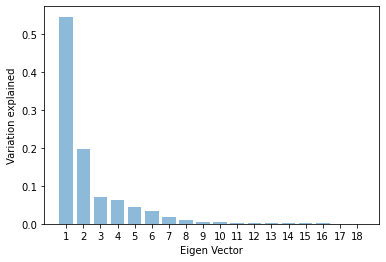

In [17]:
# Bar plot showing ratio of variance explained by each eigen vector

plt.bar(list(range(1,19)),pca_base.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('Eigen Vector')
plt.xticks(np.arange(1, 19))
plt.show()

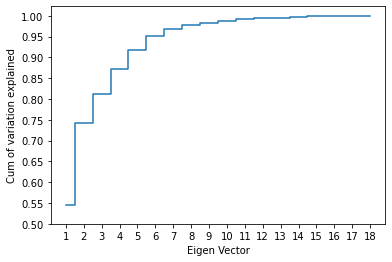

In [18]:
# Histogram showing cummulative ratio of variance explained by each eigen vector

plt.step(list(range(1,19)),np.cumsum(pca_base.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('Eigen Vector')
plt.yticks(np.arange(0.5, 1.05, 0.05))
plt.xticks(np.arange(1, 19))
plt.show()

From the above plots, we can see that by using **6 Principal components** we are able to successfully explain 95% variation in the data. We can confirm this by printing the cummulative sum of the variations explained... 

In [19]:
# Print the first 6 Principal components' cummulative variance

print(np.cumsum(pca_base.explained_variance_ratio_)[:6])

[0.54522945 0.74138006 0.81179455 0.87331703 0.91843448 0.95123271]


### Hence, we will use only the first 6 features from our data, effectively reducing dimensions down by 1/3rd

In [20]:
pca_final = PCA(n_components=6)

# Note: We are essentially using the same scaled train test split that we used for our first SVM model 
# fit_transform on the train set
X_train_pca = pca_final.fit_transform(X_train)

# Print the Principal components and cummulative variance explained
print(pca_final.components_)
print(np.cumsum(pca_final.explained_variance_ratio_))

# transform the test set
X_test_pca = pca_final.transform(X_test)

[[-0.22916611 -0.30714656 -0.32314975 -0.28596652 -0.09028525 -0.17253506
  -0.31372248  0.33675454 -0.30394394 -0.26759631 -0.27542249 -0.3011391
  -0.2543202   0.05765837 -0.04700646 -0.0515278  -0.04840218 -0.10702024]
 [-0.05471255  0.13568143 -0.05056113 -0.18956077 -0.22398437 -0.09957933
   0.08949126 -0.02376635  0.10037907  0.1101324   0.08123857  0.09661764
   0.19960544  0.49586306 -0.05783227 -0.09894673 -0.46006705 -0.56814594]
 [ 0.06770912  0.18635317 -0.04620622 -0.10794311 -0.07655026  0.12073517
  -0.09034325  0.11423674 -0.0830462   0.18266402 -0.11910917 -0.08861529
   0.17420289 -0.07299897  0.72954102 -0.52137923  0.04509689  0.03426785]
 [ 0.07421524 -0.09103957  0.1068889  -0.20128168 -0.46184414  0.14369668
   0.0340781   0.04479897  0.06053537 -0.02238099 -0.00497305  0.03258995
  -0.09452146 -0.03089792  0.4485132   0.68860027 -0.07402744  0.03451926]
 [ 0.12887207 -0.19846383 -0.11858074  0.22126712  0.24438642 -0.61834505
   0.09702715 -0.10078862  0.084619

In [21]:
# Build and evaluate the model on the transformed data

svm_pca = SVC()
svm_pca.fit(X_train_pca, y_train)
y_pred_pca = svm_pca.predict(X_test_pca)

print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           1       0.95      0.94      0.94       129
           2       0.97      0.94      0.95        64
           3       0.90      0.95      0.92        58

    accuracy                           0.94       251
   macro avg       0.94      0.94      0.94       251
weighted avg       0.94      0.94      0.94       251



### We will use Grid search with K-fold CV to identify the best model for our new transformed data

In [22]:
# We need to reduce the dimensions in our scaled data to 6 
X_pca = pca_final.fit_transform(X) # X is already scaled

In [24]:
# We define the parameter grids for each of the models
# SVM
svm_params = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [0.01, 0.1, 1, 10],
              'kernel': ['poly', 'rbf']}
estimator_specs = [
    {
        # SVM
        'estimator': SVC(random_state=42, probability=True),
        'params'   : svm_params,
        'scorer'   : custom_scorer
    }
]

results_pca = get_best_model(X_pca, y, estimator_specs)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] C=0.01, gamma=0.01, kernel=poly .................................
[CV] .................. C=0.01, gamma=0.01, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=poly .................................
[CV] .................. C=0.01, gamma=0.01, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=poly .................................
[CV] .................. C=0.01, gamma=0.01, kernel=poly, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.01, gamma=0.01, kernel=poly .................................
[CV] .................. C=0.01, gamma=0.01, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=poly .................................
[CV] .................. C=0.01, gamma=0.01, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=poly .................................
[CV] .................. C=0.01, gamma=0.01, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=poly .................................
[CV] .................. C=0.01, gamma=0.01, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=poly .................................
[CV] .................. C=0.01, gamma=0.01, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=poly .................................
[CV] .................. C=0.01, gamma=0.01, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=poly .................................
[CV] .................. C=0.01, gamma=0.01, kernel=poly, total=   0.1s
[CV] C

[CV] .................... C=0.01, gamma=10, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=10, kernel=poly ...................................
[CV] .................... C=0.01, gamma=10, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=10, kernel=poly ...................................
[CV] .................... C=0.01, gamma=10, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=10, kernel=poly ...................................
[CV] .................... C=0.01, gamma=10, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=10, kernel=poly ...................................
[CV] .................... C=0.01, gamma=10, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=10, kernel=poly ...................................
[CV] .................... C=0.01, gamma=10, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=10, kernel=poly ...................................
[CV] .................... C=0.01, gamma=10, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=10, kernel=poly ...................................
[CV] .

[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] .

[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] .

[CV] ........................ C=1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........................ C=1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........................ C=1, gamma=10, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .................... C=10, gamma=0.01, kernel=poly, total=   0.1s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .................... C=10, gamma=0.01, kernel=poly, total=   0.1s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .................... C=10, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .................... C=10, gamma=0.01, kernel=poly, total=   0.1s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .

[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=poly .....................................
[CV] ...................... C=10, gamma=10, kernel=poly, total=   8.6s
[CV] C=10, gamma=10, kernel=poly .....................................
[CV] ...................... C=10, gamma=10, kernel=poly, total=  12.2s
[CV] C=10, gamma=10, kernel=poly .....................................
[CV] ...................... C=10, gamma=10, kernel=poly, total=   8.0s
[CV] C=10, gamma=10, kernel=poly .....................................
[CV] ...................... C=10, gamma=10, kernel=poly, total=   9.2s
[CV] C=10, gamma=10, kernel=poly .....................................
[CV] .

[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   0.3s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   0.4s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   0.3s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] .

[CV] ................... C=1000, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=1000, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=1000, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=1000, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=poly ..................................
[CV] ................... C=1000, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=poly ..................................
[CV] ................... C=1000, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=poly ..................................
[CV] ................... C=1000, gamma=0.1, kernel=poly, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=poly ..................................
[CV] .

[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.1s


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed: 101.7min finished


### Now we will compare our new model (after PCA) with the original model (before PCA)

In [25]:
# Gather the models

best_model_before_pca = results[0]['estimator']
best_model_after_pca = results_pca[0]['estimator']

In [26]:
# We define a function which prints out the classification report for a model

def print_metrics(model, X_train, y_train, X_test, y_test, model_name=None):
    """
    Fits the best estimator model on train set and predicts classes, then
    Prints out the classification report, roc_curve for the given model
    """
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"Classification report for Model: {model_name}")
    print(classification_report(y_test, predictions)+"\n\n")

In [27]:
print_metrics(best_model_before_pca, X_train, y_train, X_test, y_test, model_name='SVM without PCA')
print_metrics(best_model_after_pca, X_train_pca, y_train, X_test_pca, y_test, model_name='SVM with PCA')

Classification report for Model: SVM without PCA
              precision    recall  f1-score   support

           1       0.98      0.98      0.98       129
           2       0.98      1.00      0.99        64
           3       0.96      0.95      0.96        58

    accuracy                           0.98       251
   macro avg       0.98      0.98      0.98       251
weighted avg       0.98      0.98      0.98       251



Classification report for Model: SVM with PCA
              precision    recall  f1-score   support

           1       0.95      0.95      0.95       129
           2       0.98      0.95      0.97        64
           3       0.90      0.95      0.92        58

    accuracy                           0.95       251
   macro avg       0.95      0.95      0.95       251
weighted avg       0.95      0.95      0.95       251





### We see that we are able to bring down the dimensions to 1/3rd the original dimensions while only sacrificing ~3% accuracy, which is a very good result.  
### Being able to reduce dimensions helps us to get a robust model.  

## Conclusion:

#### We see that we are able to reduce the dimensions to 6 from 18 while retaining a good accuracy score.